In [2]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


From the given csv file, please create a nested pie chart of the shots by team. In the inner pie show the team and the total shots and in the outer pie classify the shot depending if they were on target or off target. For the outer pie color the slices in red for off target and green for on target and show it in a legend located in the best possible position. Use the actual numnber of shots instead of percentage as labels for each slice.

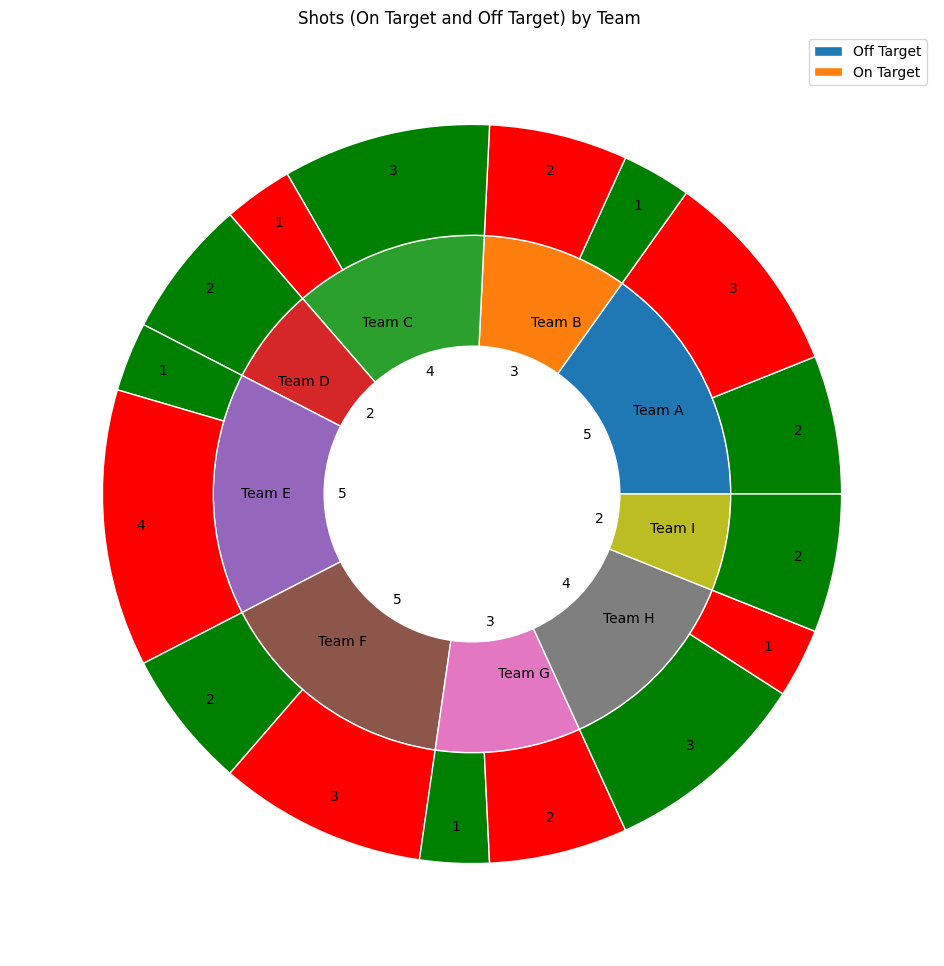

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/gdrive/MyDrive/ICE-V2-Dataset/Datasets/data_111football_match_data.csv")

# Select relevant columns
df = df.loc[:, ["Home Team", "Shots on Target", "Shots Off Target"]]

# Rename columns for clarity
df = df.rename(columns={"Shots on Target": "On Target", "Shots Off Target": "Off Target"})

# Reshape the data using melt
df = df.melt(id_vars=["Home Team"],
             var_name="Type",
             value_name="Shots").sort_values(["Home Team", "Type"])

# Group by team and type, and compute sums
inner = df.groupby("Home Team").sum(numeric_only=True)
outer = df.groupby(["Home Team", "Type"]).sum(numeric_only=True)

# Filter out rows with zero shots
outer = outer[outer['Shots'] > 0]

# Extract type labels for outer pie chart
outer_labels = outer.index.get_level_values(1)

# Create the pie chart
fig, ax = plt.subplots(figsize=(24, 12))
size = 0.3

# Colors for outer pie chart segments
colors = {'On Target': 'red',
          'Off Target': 'green'}

def autopct_format(values):
    """
    Custom function to format pie chart labels as total counts.
    """
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}'.format(v=val)
    return my_format

# Inner pie chart
ax.pie(inner.values.flatten(), radius=1 - size,
       labels=inner.index,
       autopct = autopct_format(outer['Shots'].values.flatten()),
       wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.5, labeldistance=0.7)

# Outer pie chart
ax.pie(outer['Shots'].values.flatten(), radius=1, colors=[colors[v] for v in outer_labels.tolist()],
       wedgeprops=dict(width=size, edgecolor='w'), autopct = autopct_format(outer['Shots'].values.flatten()), pctdistance=0.9,)

# Set title and legend
ax.set(title='Shots (On Target and Off Target) by Team ')
plt.legend(df['Type'].unique(), loc="best")

# Show the plot
plt.show()

Sure, here is the nested pie chart of the total number of shots grouped by type fot each team:

[image of the query]

I hope it helps!
